In [141]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# 1. **Import Necessary packages**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import KNNImputer

# **2. Read the Dataset**

In [0]:
path_files = '/content/drive/My Drive/Co_lab/Capstone/1min_Average_Datasets/'
november_df = pd.read_csv((path_files + '1 Walk-In 2019-11-1 2019-11-30.csv'), skiprows = [0,1,2,3,4,5,6,7,8,9,10], names = ['Date', 'Time', 'Zone', 'Temperature (F)'], 
                          skip_blank_lines = True, skipfooter = 1, engine = 'python')

december_df = pd.read_csv((path_files + '1 Walk-In 2019-12-1 2019-12-31.csv'), skiprows = [0,1,2,3,4,5,6,7,8,9,10], names = ['Date', 'Time', 'Zone', 'Temperature (F)'], 
                          skip_blank_lines = True, skipfooter = 1, engine = 'python')

jan_df =  pd.read_csv((path_files + '1 Walk-In 2020-1-1 2020-1-31.csv'), skiprows = [0,1,2,3,4,5,6,7,8,9,10], names = ['Date', 'Time', 'Zone', 'Temperature (F)'], 
                          skip_blank_lines = True, skipfooter = 1, engine = 'python')

feb_df = pd.read_csv((path_files + '1 Walk-In 2020-2-1 2020-2-29.csv'), skiprows = [0,1,2,3,4,5,6,7,8,9,10], names = ['Date', 'Time', 'Zone', 'Temperature (F)'], 
                          skip_blank_lines = True, skipfooter = 1, engine = 'python')

In [144]:
november_df.head()

,Date,Time,Zone,Temperature (F)
0,2019-11-04,16:50,EST,67.5
1,2019-11-04,16:51,EST,67.3
2,2019-11-04,16:52,EST,67.3
3,2019-11-04,16:53,EST,67.3
4,2019-11-04,16:54,EST,67.2


In [145]:
december_df.head()

,Date,Time,Zone,Temperature (F)
0,2019-12-01,00:00,EST,39.6
1,2019-12-01,00:01,EST,39.4
2,2019-12-01,00:02,EST,39.4
3,2019-12-01,00:03,EST,39.4
4,2019-12-01,00:04,EST,39.0


In [146]:
jan_df.head()

,Date,Time,Zone,Temperature (F)
0,2020-01-01,16:18,EST,37.9
1,2020-01-01,16:19,EST,37.9
2,2020-01-01,16:21,EST,38.1
3,2020-01-01,16:22,EST,38.3
4,2020-01-01,16:23,EST,38.3


In [147]:
feb_df.head()

,Date,Time,Zone,Temperature (F)
0,2020-02-01,00:00,EST,37.9
1,2020-02-01,00:01,EST,37.9
2,2020-02-01,00:02,EST,37.9
3,2020-02-01,00:03,EST,37.9
4,2020-02-01,00:04,EST,37.8


In [148]:
november_df.shape

(34226, 4)

In [149]:
december_df.shape

(25488, 4)

In [150]:
jan_df.shape

(35364, 4)

In [151]:
feb_df.shape

(8008, 4)

In [152]:
november_df.dtypes

Date                object
Time                object
Zone                object
Temperature (F)    float64
dtype: object

In [153]:
november_df['Zone'].unique()

array(['EST'], dtype=object)

In [0]:
november_df['Date_Time'] = pd.to_datetime(november_df['Date'] + ' ' + november_df['Time'])
december_df['Date_Time'] = pd.to_datetime(december_df['Date'] + ' ' + december_df['Time'])
jan_df['Date_Time'] = pd.to_datetime(jan_df['Date'] + ' ' + jan_df['Time'])
feb_df['Date_Time'] = pd.to_datetime(feb_df['Date'] + ' ' + feb_df['Time'])

In [155]:
november_df.head()

,Date,Time,Zone,Temperature (F),Date_Time
0,2019-11-04,16:50,EST,67.5,2019-11-04 16:50:00
1,2019-11-04,16:51,EST,67.3,2019-11-04 16:51:00
2,2019-11-04,16:52,EST,67.3,2019-11-04 16:52:00
3,2019-11-04,16:53,EST,67.3,2019-11-04 16:53:00
4,2019-11-04,16:54,EST,67.2,2019-11-04 16:54:00


In [156]:
november_df['Date'].unique()

array(['2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07',
       '2019-11-08', '2019-11-09', '2019-11-10', '2019-11-11',
       '2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
       '2019-11-16', '2019-11-17', '2019-11-18', '2019-11-19',
       '2019-11-20', '2019-11-21', '2019-11-22', '2019-11-23',
       '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27',
       '2019-11-28', '2019-11-29', '2019-11-30'], dtype=object)

# 3. **Find Missing (or) Null Values**  

In [157]:
november_df.isnull().sum()

Date               0
Time               0
Zone               0
Temperature (F)    0
Date_Time          0
dtype: int64

In [158]:
december_df.isnull().sum()

Date               0
Time               0
Zone               0
Temperature (F)    0
Date_Time          0
dtype: int64

In [159]:
jan_df.isnull().sum()

Date               0
Time               0
Zone               0
Temperature (F)    0
Date_Time          0
dtype: int64

In [160]:
feb_df.isnull().sum()

Date               0
Time               0
Zone               0
Temperature (F)    0
Date_Time          0
dtype: int64

# **4. Dataset Visualization**

### Line Plot

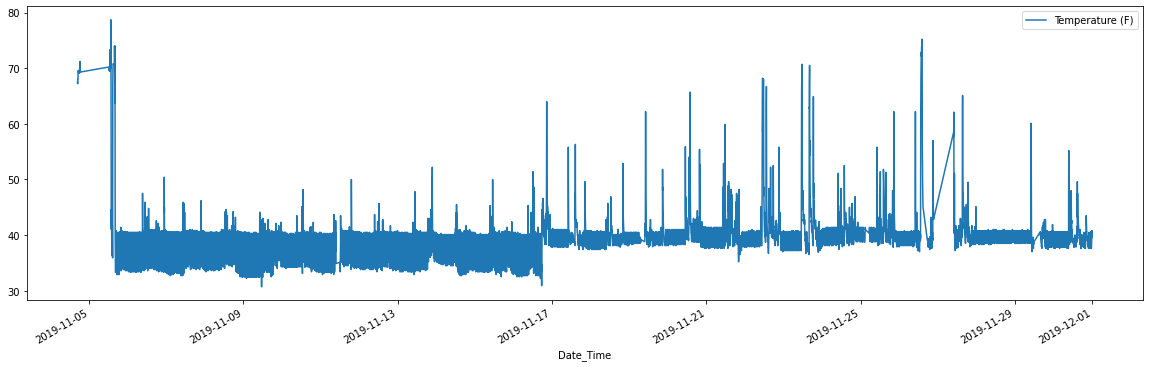

In [161]:
november_df.plot(x = 'Date_Time', y = 'Temperature (F)',figsize=(20,6)) #style = 'k.' for dotted lines
plt.show()

### Line plot -- Group By day and then plot all the temperatures of different times on the particular day

In [0]:
#from pandas import DataFrame
#df = november_df.drop(['Zone', 'Date_Time'], axis = 1)
#groups = df.set_index('Date').groupby('Date')
#groups = df.groupby(Grouper(freq='A'))
#Days = DataFrame()
#for name, group in groups:
#	Days[name] = group.values
#Days.plot(subplots=True, legend=False)
#pyplot.show()

# LSTM Model

In [0]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from statsmodels.tools.eval_measures import rmse

In [0]:
df1 = november_df.drop(['Date', 'Time', 'Zone'], axis = 1)
df2 = december_df.drop(['Date', 'Time', 'Zone'], axis = 1)
df3 = jan_df.drop(['Date', 'Time', 'Zone'], axis = 1)
df4 = feb_df.drop(['Date', 'Time', 'Zone'], axis = 1)

In [0]:
final_df = pd.DataFrame()
final_df = final_df.append(df1).append(df2).append(df3).append(df4)

In [166]:
final_df.sort_values('Date_Time')
final_df.head()

,Temperature (F),Date_Time
0,67.5,2019-11-04 16:50:00
1,67.3,2019-11-04 16:51:00
2,67.3,2019-11-04 16:52:00
3,67.3,2019-11-04 16:53:00
4,67.2,2019-11-04 16:54:00


In [167]:
final_df.set_index('Date_Time',inplace=True)
final_df.head()

,Temperature (F)
Date_Time,
2019-11-04 16:50:00,67.5
2019-11-04 16:51:00,67.3
2019-11-04 16:52:00,67.3
2019-11-04 16:53:00,67.3
2019-11-04 16:54:00,67.2


In [168]:
final_df.rename(columns={'Temperature (F)':'Temp_F'},inplace=True)
final_df.head()

,Temp_F
Date_Time,
2019-11-04 16:50:00,67.5
2019-11-04 16:51:00,67.3
2019-11-04 16:52:00,67.3
2019-11-04 16:53:00,67.3
2019-11-04 16:54:00,67.2


### Create a DataFrame which has all the data points from nov2019 to dec 2020 as a continuous timeseries, with records for all the 1 min intervals
### Then we are using KNN method for imputation
--Dinakar

In [0]:
df1.set_index('Date_Time',inplace=True)
df2.set_index('Date_Time',inplace=True)
df3.set_index('Date_Time',inplace=True)
df4.set_index('Date_Time',inplace=True)

In [170]:
df_names = [df1, df2, df3, df4]
months = ['nov', 'dec', 'jan', 'feb']
data_full = pd.DataFrame(columns = ['Time','Temperature'])

for month, name in zip(months,df_names):
    print(month)
    print(name.shape)
    month = name.groupby(pd.Grouper(freq='1Min'))
    new_df = pd.DataFrame(columns = ['Time','Temperature'])
    for name, group in month:
        if (len(group.values.flatten()) == 0):
            new_df = new_df.append({'Time':name,'Temperature':np.nan}, ignore_index=True)
        else:
            new_df = new_df.append({'Time':name,'Temperature':group.values.flatten()[0]}, ignore_index=True)
    #data_full has the continuous data with nan values            
    data_full = pd.concat([data_full, new_df], sort=False, ignore_index=True)

nov
(34226, 1)
dec
(25488, 1)
jan
(35364, 1)
feb
(8008, 1)


In [0]:
  data_full.set_index('Time', drop=True, append=False, inplace=True, verify_integrity=False)

In [172]:
data_full.shape

(133927, 1)

In [173]:
data_full.sample(5)

,Temperature
Time,
2019-11-28 16:45:00,40.6
2019-12-27 10:23:00,42.6
2019-11-29 00:34:00,40.6
2020-02-05 16:59:00,39.4
2019-11-08 00:20:00,38.5


In [174]:
#We see that we have 30841 null values
data_full.isna().sum()

Temperature    30841
dtype: int64

In [0]:
#Impute missing values in numeric columns using kNN Imputation
imputer = KNNImputer(n_neighbors=15, weights="uniform")
imputed_values = imputer.fit_transform(data_full)

In [176]:
#convert the numeric columns after imputation to a dataframe
#data_imputed is complete datset imputed with KNN imputation values
data_imputed = pd.DataFrame(imputed_values, columns=['Temperature'])
data_imputed.index = data_full.index
print(data_imputed.shape)
data_imputed.head()

(133927, 1)


,Temperature
Time,
2019-11-04 16:50:00,67.5
2019-11-04 16:51:00,67.3
2019-11-04 16:52:00,67.3
2019-11-04 16:53:00,67.3
2019-11-04 16:54:00,67.2


In [177]:
data_imputed.index

DatetimeIndex(['2019-11-04 16:50:00', '2019-11-04 16:51:00',
               '2019-11-04 16:52:00', '2019-11-04 16:53:00',
               '2019-11-04 16:54:00', '2019-11-04 16:55:00',
               '2019-11-04 16:56:00', '2019-11-04 16:57:00',
               '2019-11-04 16:58:00', '2019-11-04 16:59:00',
               ...
               '2020-02-06 13:51:00', '2020-02-06 13:52:00',
               '2020-02-06 13:53:00', '2020-02-06 13:54:00',
               '2020-02-06 13:55:00', '2020-02-06 13:56:00',
               '2020-02-06 13:57:00', '2020-02-06 13:58:00',
               '2020-02-06 13:59:00', '2020-02-06 14:00:00'],
              dtype='datetime64[ns]', name='Time', length=133927, freq=None)

In [178]:
data_imputed.isna().sum()

Temperature    0
dtype: int64

##  Create training and test datasets by Standardising the input

In [0]:
#70% examples will used for training (in the begining)
train_size = int(len(data_imputed) * 0.70)

#30% will be used for Test
test_size = len(data_imputed - train_size)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
#Normalize the data
scaler = StandardScaler()
scaled = scaler.fit_transform(data_imputed)

In [0]:
#70% examples will used for training (in the begining)
train_size = int(len(scaled) * 0.70)

#30% will be used for Test
test_size = len(scaled - train_size)

In [183]:
#Split the data
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 93748
test: 40179


In [184]:
train.shape

(93748, 1)

In [185]:
test.shape

(40179, 1)

In [0]:
#window - how long the sequence will be
def create_dataset(dataset, window=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-window):
        
        a = dataset[i:(i+window), 0]        
        dataX.append(a)
        dataY.append(dataset[i + window, 0])
    
    return np.array(dataX), np.array(dataY)

# 180 Min Prediction

In [0]:
#Create Input and Output
window_size = 180
X_train, y_train = create_dataset(train, window_size)
X_test, y_test = create_dataset(test, window_size)

In [188]:
X_train.shape

(93568, 180)

In [189]:
y_train.shape

(93568,)

In [190]:
print(len(X_train[0]))

180


In [191]:
len(y_train)

93568

In [192]:
(X_train.shape[0], X_train.shape[1], 1)

(93568, 180, 1)

In [193]:
#make it 3 Dimensional Data - needed for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(93568, 180, 1)
(39999, 180, 1)


In [194]:
X_test

array([[[-0.92630866],
        [-0.64341466],
        [-0.71413816],
        ...,
        [-0.92630866],
        [-1.0323939 ],
        [-0.96167041]],

       [[-0.64341466],
        [-0.71413816],
        [-0.78486166],
        ...,
        [-1.0323939 ],
        [-0.96167041],
        [-0.92630866]],

       [[-0.71413816],
        [-0.78486166],
        [-0.85558516],
        ...,
        [-0.96167041],
        [-0.92630866],
        [-0.85558516]],

       ...,

       [[-0.14835017],
        [-0.21907366],
        [-0.28979716],
        ...,
        [-0.14835017],
        [ 0.34671433],
        [ 1.76118431]],

       [[-0.21907366],
        [-0.28979716],
        [-0.28979716],
        ...,
        [ 0.34671433],
        [ 1.76118431],
        [ 3.1049308 ]],

       [[-0.28979716],
        [-0.28979716],
        [-0.32515891],
        ...,
        [ 1.76118431],
        [ 3.1049308 ],
        [ 4.05969803]]])

## Build LSTM Model

# NADAM

In [197]:
# define model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256, activation='relu',input_shape=(window_size, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='Nadam', loss='mse')

In [198]:
model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/25
1462/1462 [==============================] - 157s 108ms/step - loss: 0.1450 - val_loss: 0.0743
Epoch 2/25
1462/1462 [==============================] - 157s 107ms/step - loss: 0.1172 - val_loss: 0.0812
Epoch 3/25
1462/1462 [==============================] - 157s 107ms/step - loss: 0.1133 - val_loss: 0.0748
Epoch 4/25
1462/1462 [==============================] - 157s 107ms/step - loss: 0.1118 - val_loss: 0.0804
Epoch 5/25
1462/1462 [==============================] - 157s 108ms/step - loss: 0.1066 - val_loss: 0.0969
Epoch 6/25
1462/1462 [==============================] - 158s 108ms/step - loss: 0.1080 - val_loss: 0.0746
Epoch 7/25
1462/1462 [==============================] - 157s 108ms/step - loss: 0.1072 - val_loss: 0.0688
Epoch 8/25
1462/1462 [==============================] - 157s 108ms/step - loss: 0.1039 - val_loss: 0.0718
Epoch 9/25
1462/1462 [==============================] - 157s 107ms/step - loss: 0.1065 - val_loss: 0.0706
Epoch 10/25
1462/1462 [=======================

In [0]:
#Un-normalize the predited data
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [200]:
rmse = np.sqrt(metrics.mean_squared_error(trainPredict, y_train))
rmse

0.2863980965574185

In [201]:
rmse = np.sqrt(metrics.mean_squared_error(testPredict, y_test))
rmse

0.265290626159035

In [202]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(testPredict, y_test)
r2

0.8745486043901258

In [203]:
r2 = r2_score(trainPredict, y_train)
r2

0.9214140548891039

In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

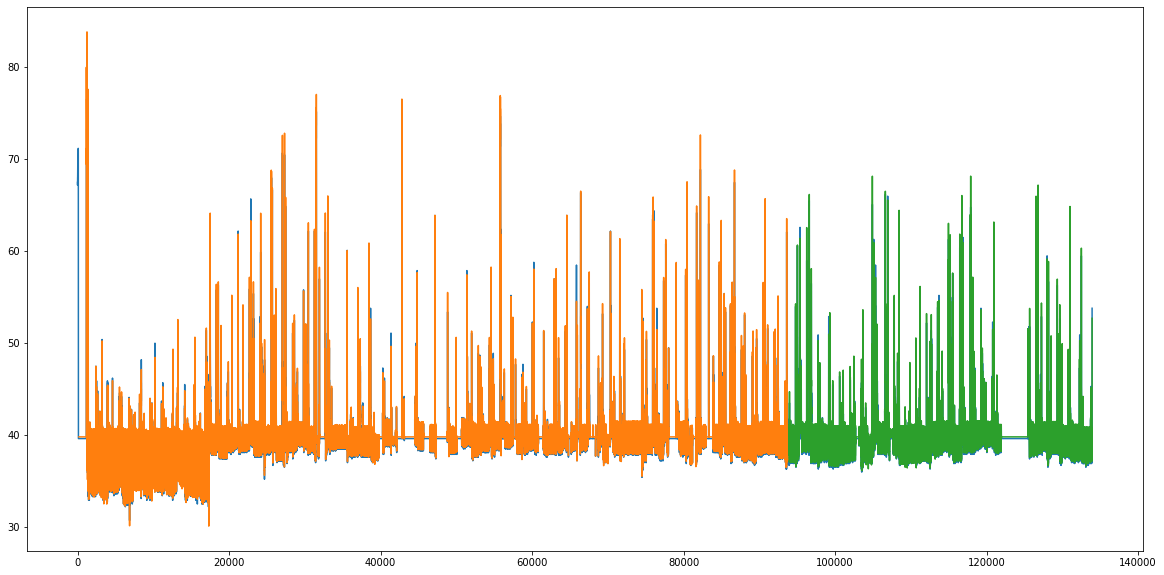

In [205]:
trainPredictPlot = np.empty_like(final_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2):len(scaled), :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

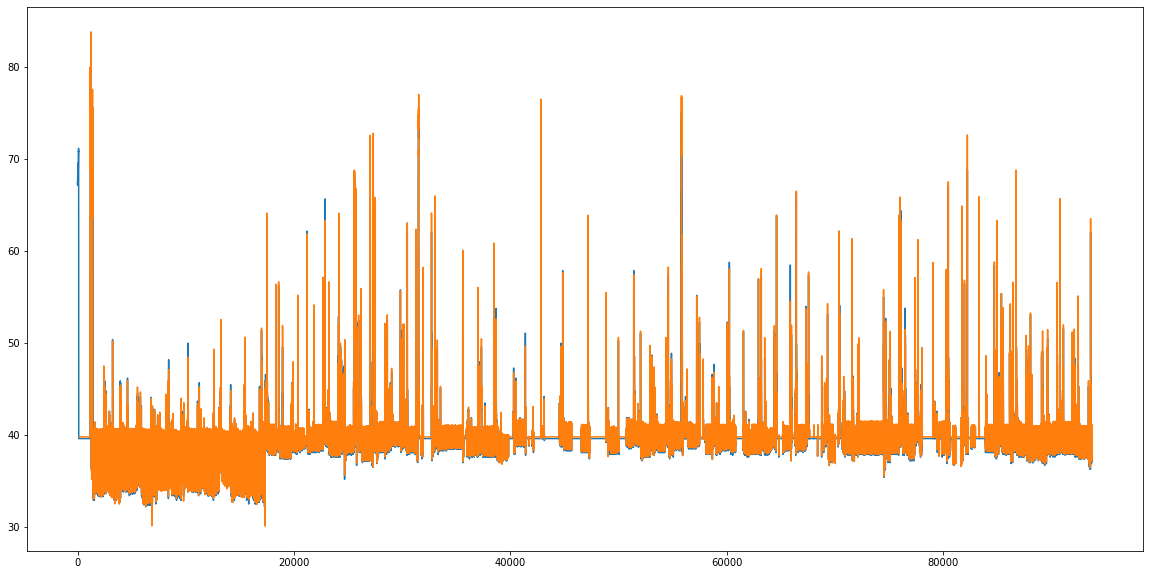

In [206]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(train)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(train))
plt.plot(trainPredictPlot)
plt.show()

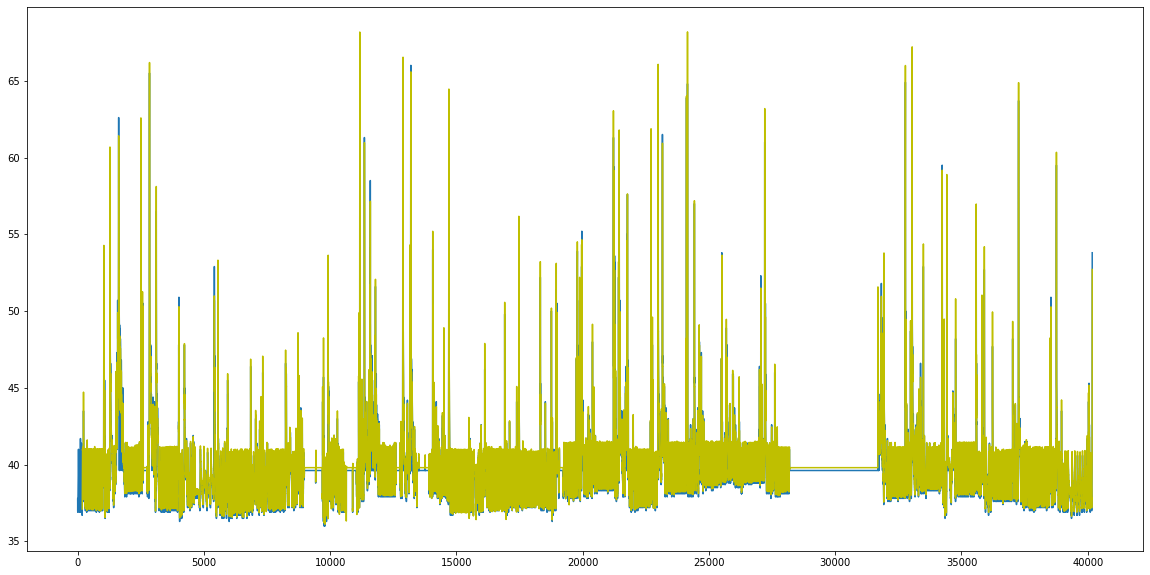

In [207]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(test)
testPredictPlot[:, :] = np.nan
testPredictPlot[window_size:, :] = testPredict
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(test))
plt.plot(testPredictPlot,color='y')
plt.show()